In [32]:
pip freeze > model_requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd

In [34]:
data_train_df = pd.read_csv("data_train_min_max_scaled_csv")
data_test_df = pd.read_csv("data_test_csv")

In [35]:
data_train_df

,Unnamed: 0,Row ID,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Winner_num,Remaining overs and balls,Remainder
0,0,0,0.156259,0.071429,0.169925,0.283886,-0.348593,-0.259181,1,0.997869,0.990530
1,1,1,0.156259,0.071429,0.169925,0.283886,-0.348593,-0.259181,1,0.995725,0.988617
2,2,3,0.156259,0.071429,0.169925,0.283886,-0.348593,-0.259181,1,0.991402,0.984773
3,3,4,0.156259,0.071429,0.169925,0.283886,-0.348593,-0.259181,1,0.989223,0.982841
4,4,6,0.156259,0.071429,0.169925,0.283886,-0.348593,-0.259181,1,0.984826,0.971114
...,...,...,...,...,...,...,...,...,...,...,...
216173,216173,270216,0.156259,-0.142857,-0.215365,-0.141677,0.084371,-0.098113,2,0.171309,-0.164188
216174,216174,270218,0.156259,-0.142857,-0.215365,-0.141677,0.084371,-0.098113,2,0.132804,-0.192604
216175,216175,270219,0.156259,-0.142857,-0.215365,-0.141677,0.084371,-0.098113,2,0.112003,-0.270374
216176,216176,270220,0.156259,-0.142857,-0.215365,-0.141677,0.084371,-0.098113,2,0.090012,-0.287257


In [36]:
data_train_df = data_train_df.drop(['Unnamed: 0', 'Row ID'], axis=1)
data_test_df = data_test_df.drop(['Unnamed: 0', 'Row ID'], axis=1)

In [37]:
data_train_df = data_train_df.drop(['Start Team Value', 'Remaining overs and balls', 'Remaining Average Team Value', 'Ground RPO'], axis=1)
y_train = data_train_df['Winner_num']
X_train = data_train_df.drop('Winner_num',axis=1)
X_test = data_test_df.drop(['Start Team Value', 'Remaining overs and balls', 'Remaining Average Team Value', 'Winner_num', 'Ground RPO'],axis=1) 
y_test = data_test_df['Winner_num']

In [38]:
#y_train = data_train_df['Winner_num']
#X_train = data_train_df.drop('Winner_num',axis=1)
#X_test = data_test_df.drop('Winner_num',axis=1)
#y_test = data_test_df['Winner_num']

In [39]:
data_train_df

,Wickets taken,Remaining Team Value,Ground RPW,Winner_num,Remainder
0,0.156259,0.071429,-0.259181,1,0.990530
1,0.156259,0.071429,-0.259181,1,0.988617
2,0.156259,0.071429,-0.259181,1,0.984773
3,0.156259,0.071429,-0.259181,1,0.982841
4,0.156259,0.071429,-0.259181,1,0.971114
...,...,...,...,...,...
216173,0.156259,-0.142857,-0.098113,2,-0.164188
216174,0.156259,-0.142857,-0.098113,2,-0.192604
216175,0.156259,-0.142857,-0.098113,2,-0.270374
216176,0.156259,-0.142857,-0.098113,2,-0.287257


Random Forest model

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
X_train

,Wickets taken,Remaining Team Value,Ground RPW,Remainder
0,0.156259,0.071429,-0.259181,0.990530
1,0.156259,0.071429,-0.259181,0.988617
2,0.156259,0.071429,-0.259181,0.984773
3,0.156259,0.071429,-0.259181,0.982841
4,0.156259,0.071429,-0.259181,0.971114
...,...,...,...,...
216173,0.156259,-0.142857,-0.098113,-0.164188
216174,0.156259,-0.142857,-0.098113,-0.192604
216175,0.156259,-0.142857,-0.098113,-0.270374
216176,0.156259,-0.142857,-0.098113,-0.287257


In [42]:
X_test

,Wickets taken,Remaining Team Value,Ground RPW,Remainder
0,3,16,29.31,29.3
1,3,16,29.31,29.0
2,3,16,29.31,27.5
3,3,16,29.31,27.1
4,3,16,29.31,26.0
...,...,...,...,...
54040,2,16,31.64,6.2
54041,2,16,31.64,6.0
54042,3,13,31.64,4.5
54043,3,13,31.64,3.1


In [43]:
rnd_clf = RandomForestClassifier(random_state=7)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.5081506152280507


In [45]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV, train_test_split


param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000235C7355C60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000235F3CFC7F0>})

In [51]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 6, 'n_estimators': 112}


In [ ]:
sdfhjk

In [52]:
rnd_clf = RandomForestClassifier(n_estimators=112, max_depth=6,
                                 n_jobs=-1, random_state=7)
rnd_clf.fit(X_train, y_train)

y_tweaked_pred_rf = rnd_clf.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_tweaked_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.5194560088814877


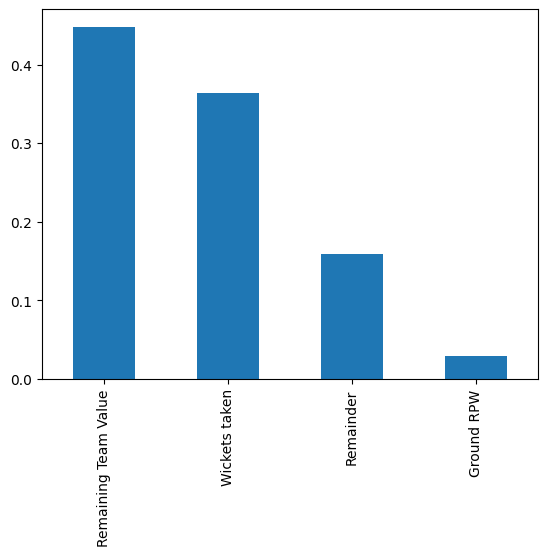

In [54]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

https://www.datacamp.com/tutorial/random-forests-classifier-python